In [ ]:
import pandas as pd
import numpy as np

In [ ]:
credits=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [ ]:
movies.head()

In [ ]:
movies.columns

In [ ]:
credits.head()

We are merging two dataframes using merge()

In [ ]:
movies=movies.merge(credits,on='title')

In [ ]:
movies.head()

# **List of Important Columns for Recom.**


1.   genres
2.   id#Jab ham website banane jayege tab movie ke jo poster chahiye hoge wo hame id ke through fetch kar sakenge
3. keywords
4. title #original_title mai local language mai hone ke karan padhne mai problem ho sakta hai.
5. overview
6. cast
7. crew


**task at the end of the project add  revenue also. and see the difference**

In [ ]:
#Is original_language imp?
#No, as you can see the data is heavily imbalanced(en=4505) so it is not worth it.
#movies['original_language'].unique()
movies['original_language'].value_counts()

In [ ]:
movies.info()

In [ ]:
movies=movies.drop(columns=['budget','homepage','original_language','original_title','popularity','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline','vote_average','vote_count','id'])
movies.info()

In [ ]:
movies.head()

# We need three columns for our recommendation
movie_id|title|tags(by joining overview,genres,keywords,cast,crew)

# **Checking for missing data and correcting it**

In [ ]:
movies.isnull().sum()

In [ ]:
movies.dropna(inplace=True)#overview is an imp column and 3 missing row is tolerable
movies.isnull().sum()

In [ ]:
#Check for duplicate data
movies.duplicated().sum()

In [ ]:
#dir(pd)

In [ ]:
#type(movies['genres'])
movies['genres'][0]
#movies['genres'][0]['name']

# **Imp document for list of dictionaries in python:**
https://www.scaler.com/topics/list-of-dictionaries-in-python/

# **Python | Program to convert String to a List**
https://www.geeksforgeeks.org/python-program-convert-string-list/

In [ ]:
# for i in movies['genres'][0]:
#   for k,v in movies['genres'].items():
#     print(v)

In [ ]:
type(movies)

**Above format is a list of dictionary**
we want format like
['Action','Adventure','name','Fantasy','Science Fiction']

In [ ]:
import ast
def convert(obj):
 L=[]
 for i in ast.literal_eval(obj):
  L.append(i['name'])
 return L

In [ ]:
#convert([{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}])

In [ ]:
# import ast
# ast.literal_eval([{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}])

# **Error explain string indices must be integers:**
The variable item is a string. An index looks like this:

>>> mystring = 'helloworld'

>>> print mystring[0]
'h'
The above example uses the 0 index of the string to refer to the first character.

Strings can't have string indices (like dictionaries can). So this won't work:

>>> mystring = 'helloworld'

>>> print mystring['stringindex']
TypeError: string indices must be integers

In [ ]:
# mystring = 'helloworld'
# print(mystring['stringindex'])
#As you can see same error got encountered as above so stringindex is not valid.

In [ ]:
movies['genres']=movies['genres'].apply(convert)
movies['genres'].head()

# **Very imp code above use it cautiously**

In [ ]:
movies.head()

In [ ]:
movies['keywords']=movies['keywords'].apply(convert)
movies.head()

In [ ]:
movies['cast'][0]

**We** want the top three actors in our movie so order:0 to order:2

In [ ]:
def convert2(obj):
 L=[]
 counter=0
 for i in ast.literal_eval(obj):
  if counter!=3:
   L.append(i['name'])
   counter+=1
  else:
   break
 return L

In [ ]:
movies['cast']=movies['cast'].apply(convert2)
movies.head()

In [ ]:
movies['crew'][1]

We want Director portion from the list of crew members.iss director ki movie acchi hoti hai and so on etc.

In [ ]:
import ast
def convert3(obj):
 L=[]
 for i in ast.literal_eval(obj):
   if i['job']=='Director':
     L.append(i['name'])
     break
 return L

In [ ]:
movies['crew']=movies['crew'].apply(convert3)
movies.head()

**We are converting the overview  also into the list**

In [ ]:
movies['overview']=movies['overview'].tolist()
type(movies['overview'])

In [ ]:
movies['overview'][0]

In [ ]:
# # movies['overview'][0]=movies['overview'][0].split()
# # movies['overview'][0]

# for i in range(len(movies['overview'])):
#   print(movies['overview'][i])

The code movies['overview'].apply(lambda x: x.split()) works on the DataFrame column 'overview':

1. movies['overview'] accesses the 'overview' column in the DataFrame 'movies'.
2. .apply() method applies a function to each element in this column.
3. lambda x: x.split() is a function splitting each text element into a list of
   words by spaces.
The result is a new Series or DataFrame where each element is a list of words from the original 'overview' text.

In [ ]:
movies['overview']=movies['overview'].apply(lambda x:x.split())
movies['overview'][0]

In [ ]:
movies.head()

In [ ]:
type(movies['genres'])

# **Flag 1:**
Understand the .apply() function and lambda function used inside it

# **Explanation:**
1. The lambda function [i.replace(" ",
    "") for i in x] performs the following:
2. For each element i in x (which is a
   list), it replaces spaces (" ") with an empty string ("") in each string element.
3. The list comprehension [i.replace(" ", "") for i in x] iterates through each string in the list x, removing spaces from each string.

**Space elimination:**
1. Objective: Eliminate spaces in movie attributes (like director, cast) to ensure uniqueness of names.
2. Issue: Potential confusion when names (e.g., 'Sam') are repeated for different attributes (director, cast).
3. Approach: Removing spaces from names to create distinct single names.
4. Reasoning: Facilitates the model to discern between individuals with the same first name.

In [ ]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
#movies['genres']

In [ ]:
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [ ]:
movies.head()

In [ ]:
#creating a new 'tags' column
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']
movies.head()

In [ ]:
print(movies['genres'][0][0])#[Action, Adventure, Fantasy,...] so we get 'Action' string.
type(movies['genres'][0][0])

In [ ]:
movies.head()

In [ ]:
#dropping out unnecessary columns from our dataframe.
movies=movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [ ]:
movies.head()

In [ ]:
new_df=movies
new_df

In [ ]:
#converted the list into strings in 'tags' column
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df.head()

In [ ]:
#Coverting our strings in tags in lowercase.
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

# **--Preprocessing Complete--**
1. Now we use nlp to deal with common words in tags we use **bag of words** techniques here.
2. We also remove stop words.

**HOme work;)**Use tf-idf and word2vec also to compare accuracy.

In [ ]:
#new_df['tags']=list(new_df['tags'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')
#for our convenience we specify max_features i.e.[0,0,1,0,..] as 5000

In [ ]:
vectors=cv.fit_transform(new_df['tags']).toarray()
vectors

In [ ]:
# corpus = [
#      'This is the first document.',
#      'This document is the second document.',
#      'And this is the third one.',
#      'Is this the first document?',
#         ]
# type(corpus) #list type
# # vectorizer = CountVectorizer()
# # X = vectorizer.fit_transform(corpus)

In [ ]:
vectors[0]

In [ ]:
cv.get_feature_names_out()#cv.get_feature_names() is in older version...

In [ ]:
len(cv.get_feature_names_out())

#We are performing stemming in nlp using nltk to stem the words=actors->actor,etc.
H.W:-do same thing with lemmatizatin and check the difference.

In [ ]:
import nltk

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
def stem(text):
 y=[]
  #global y
 for i in text.split():#Convert strings to list
    y.append(ps.stem(i))
    string=" ".join(y) #convert list back into string
 return string

**List to string conversion:**
https://www.geeksforgeeks.org/python-string-join-method/

In [ ]:
print(stem('loving'))

In [ ]:
new_df['tags']=new_df['tags'].apply(stem)

In [ ]:
len(cv.get_feature_names_out())

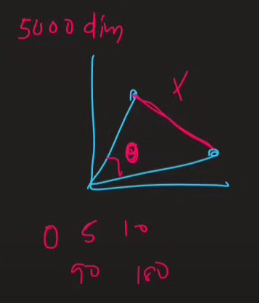

As we can see from above diagram we don't need to calculate X which is euclidean distance instead we calculate cosine similarity cos(theta)

cosine distance=1-cos(theta)
Refer this video:
https://www.youtube.com/watch?v=m_CooIRM3UI

In [ ]:
len(vectors)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [ ]:
similarity.shape#har ek movie ka distance nikalna hai 4806 movies se so 4806*4806

In [ ]:
# sorted(similarity[0],reverse=True)

In [ ]:
def recommend(movie):
  movie_index=new_df[new_df['title']==movie].index[0]
  distances=similarity[movie_index]
  movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

  for i in movies_list:
    print(new_df.iloc[i[0]]['title'])

In [ ]:
#movie_index=new_df[new_df['title']=='Shanghai Calling'].index[0]
#check for this as index 4807 or 4808 got vanished.

Sort the movies so to get top 5 similar movies together.

In [ ]:
#sorted(similarity[0],reverse=True)
   ##But while calling this sorting function we are losing our index.
    ##So we use enumerate function
#sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]
   #We take top 5 similar movies so [1:6] 6 exclusive
   # # Assuming similarity[0] represents the similarities of the first item with others
# similarity_values = list(enumerate(similarity[0]))

   # # Sort the list of tuples based on similarity values in descending order
   # # This code sorts the similarity values in descending order and pairs them with their respective indices
# sorted_values = sorted(similarity_values, reverse=True, key=lambda x:x[1])
   # # The result is a sorted list of tuples containing indices and their corresponding similarity values

In [ ]:
# new_df[new_df['title']=='Batman Begins'].index[0]

In [ ]:
new_df.iloc[0]['title']

In [ ]:
recommend("Avatar")#This is our function call required to theck for recommended movies.

In [ ]:
new_df['title'].unique()

In [ ]:
recommend("Spider-Man 3")